<a href="https://colab.research.google.com/github/Grupos5-EDA-icesi/Analisis-Exploratorio/blob/Julian-Morales_0/Analisis_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grupo 5**

### Juan Carlos Zuñiga M, Julián Morales, Leonardo Agudelo y Maria Camila Diaz

In [ ]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

## Descripcion:

La organización necesita predecir qué tipo de planes de internet y en qué rango de precios serán más contratados en los próximos 3 meses, considerando el impacto del estrato socioeconómico en la decisión de compra.

Actualmente, no existe un modelo predictivo que permita anticipar la demanda según el precio y el estrato, lo que podría generar una oferta desalineada con las necesidades del mercado, afectando la rentabilidad, planificación comercial y fidelización de clientes.

# PREGUNTA SMART

### **¿Qué tipo de planes de internet y en qué rango de precios tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?**

In [ ]:
#df = pd.read_csv("./Data/data_transformada.csv")
df = pd.read_csv('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/data_transformada.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22385 entries, 0 to 22384
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_actived                   22385 non-null  object 
 1   Genero                       22385 non-null  object 
 2   Edad                         22385 non-null  int64  
 3   estrato                      22385 non-null  int64  
 4   plan                         22385 non-null  object 
 5   id_plan                      22385 non-null  int64  
 6   price_plan                   22385 non-null  float64
 7   user_creation_id             22385 non-null  int64  
 8   cdo                          22385 non-null  object 
 9   Retiro                       22385 non-null  object 
 10  id_comuna                    22385 non-null  int64  
 11  Comuna                       22385 non-null  object 
 12  duracion_contrato            22385 non-null  int64  
 13  dia_semana_num  

### Para el análisis bivariado, vamos a seleccionar dos variables clave que pueden influir en la contratación de los planes de internet. Dado el enfoque de la pregunta SMART, elegiremos:

#### - price_plan (Precio del plan): Para analizar cómo influye el precio en la compra de los planes.

#### - estrato (Estrato socioeconómico): Para ver cómo varía la preferencia de compra según el nivel socioeconómico.

### Justificación de la elección

#### - El precio del plan es un factor determinante en la decisión de compra. Diferentes estratos pueden tener distintas capacidades de pago y preferencias de planes.

#### - El estrato socioeconómico segmenta a los clientes en grupos que pueden mostrar diferencias en la probabilidad de contratación.

In [ ]:
# 1. Estadísticas descriptivas de las variables seleccionadas

price_plan = df['price_plan'].describe()
estrato = df['estrato'].describe()

price_plan, estrato

(count     22385.000000
 mean      69330.063726
 std       13868.478439
 min       41576.000000
 25%       61965.000000
 50%       66399.000000
 75%       70549.000000
 max      149999.000000
 Name: price_plan, dtype: float64,
 count    22385.000000
 mean         2.650212
 std          1.354399
 min          1.000000
 25%          2.000000
 50%          2.000000
 75%          3.000000
 max          6.000000
 Name: estrato, dtype: float64)

### Estadísticas Descriptivas

> price_plan (Precio del Plan)

- Precio promedio: 69,330

- Precio mínimo: 41,576

- Precio máximo: 149,999

- Mayoría de los planes están entre 61,965 y 70,549 (rango intercuartil).

> estrato (Estrato Socioeconómico)

- La mayoría de los clientes pertenecen a estratos 1, 2 y 3 (ver percentiles).

### Relacion entre las Variables:

In [ ]:
# 2. Cálculo de correlación entre price_plan y estrato
correlacion = df[['price_plan', 'estrato']].corr().iloc[0, 1]

correlacion

0.3526773604540541

- Coeficiente de correlación: 0.3527

- Hay una correlación positiva moderada, lo que indica que a mayor estrato, mayor precio de plan contratado.

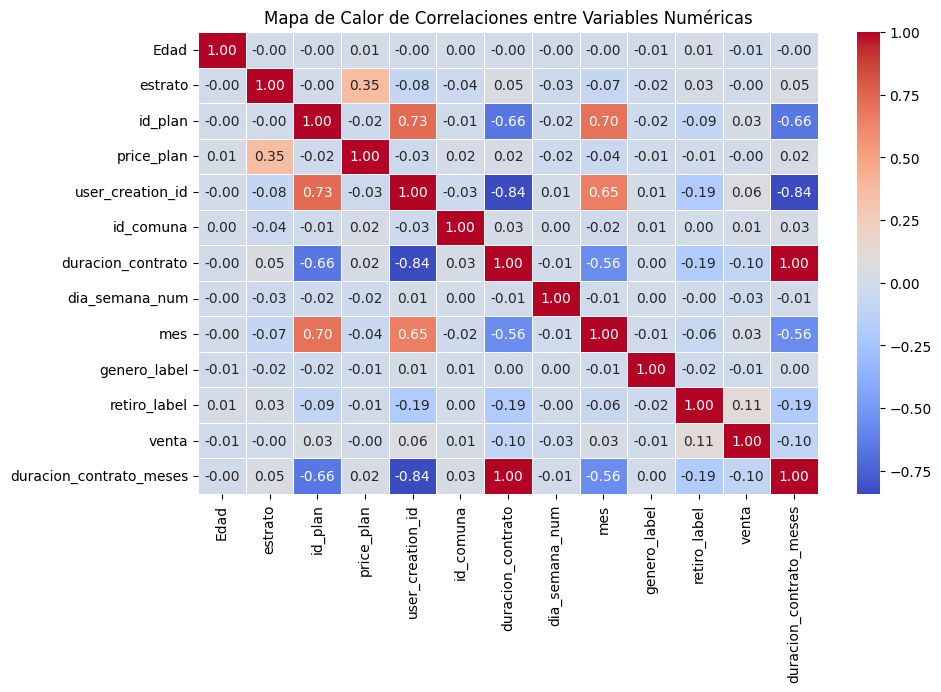

In [ ]:
# Seleccionar solo las variables numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()


> En el mapa de calor de correlaciones, podemos observar la relación entre diferentes variables numéricas en nuestro dataset. La elección de estrato y price_plan para el análisis bivariado se justifica por los siguientes puntos:

- La correlación entre estrato y price_plan es de 0.35, lo que indica una relación positiva moderada.
- Esta relación es clave para entender cómo se segmenta el mercado y qué tipo de estrategias pueden aplicarse para cada grupo socioeconómico.

- Otras variables como venta tienen correlaciones muy bajas con la mayoría de los factores (~0.03), lo que indica que la compra no está fuertemente determinada por una sola variable, sino por una combinación de factores.

- La relación entre estrato y price_plan es clave para segmentar el mercado y predecir qué precios tienen mayor demanda en los diferentes niveles socioeconómicos.


In [ ]:
# Crear grupos de precios de forma manual basada en los intervalos observados en el gráfico
bins = [40000, 60000, 70000, 80000, 90000, 100000, 150000]
#labels = [f'Grupo {i+1}' for i in range(len(bins) - 1)]
labels = ['< 60k', '60k - 70k', '70k - 80k', '80k - 90k', '90k - 100k', '> 100k']

# Asignar los grupos de precios a una nueva columna
df['grupo_price_plan'] = pd.cut(df['price_plan'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de contingencia con los grupos de precio
tabla_contingencia_agrupada = pd.crosstab(df['estrato'], df['grupo_price_plan'])

# Mostrar la tabla de contingencia agrupada
tabla_contingencia_agrupada


grupo_price_plan,< 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,> 100k
estrato,,,,,,
1,439,3625,784,8,27,49
2,778,4292,1321,21,50,149
3,1046,3157,1141,35,100,170
4,145,675,1363,328,30,156
5,73,331,788,191,17,140
6,16,124,568,116,11,121


### Observaciones:

- Los clientes de estratos 1, 2 y 3 prefieren planes entre 60k y 70k.

- Grupo de precios 60k - 70k tiene la mayor cantidad de clientes en todos los estratos.

- El estrato 2 es el más numeroso en este rango con 4,292 clientes.

- El estrato 3 también tiene una alta representación en este rango (3,157 clientes).

- Los estratos bajos (1, 2, 3) tienen muy pocos clientes en precios altos (>100k).

- Estrato 1 solo tiene 49 clientes en planes de más de 100k.

- Estrato 2 tiene 149 clientes en este grupo de precios, pero sigue siendo una minoría.

- Los estratos más altos (4, 5 y 6) tienen una mayor representación en planes más costosos.

- Estrato 4 tiene una distribución más uniforme, con más presencia en planes de 70k - 90k.

- Estrato 5 y 6 tienen más clientes en los rangos de precios más altos (>100k).

### Observaciones claves:

- Los planes de 60k - 70k tienen mayor probabilidad de ser contratados en los próximos meses porque son los más populares en todos los estratos.

- Los estratos bajos (1, 2, 3) buscan planes económicos y tienen baja participación en los planes de más de 100k.

- Los estratos altos (4, 5, 6) tienen más flexibilidad para comprar planes premium, pero la cantidad de clientes en estos estratos es menor.

- Si se quiere aumentar la conversión en planes más caros, se debe analizar qué motiva a los estratos altos a elegir ciertos precios.

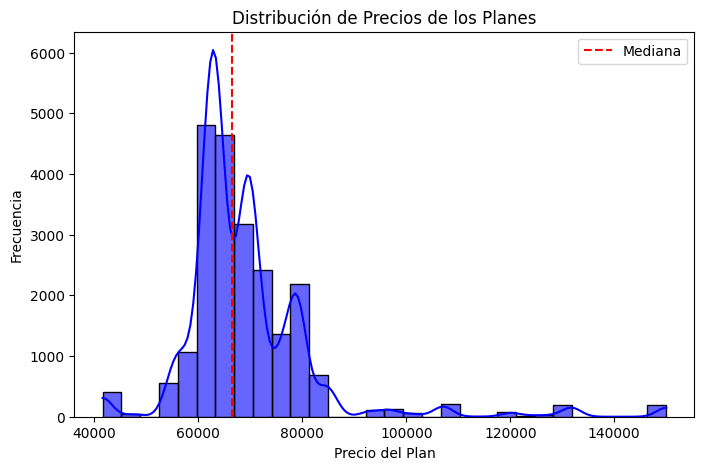

In [ ]:
 # Crear un gráfico de distribución (histograma + KDE) para visualizar el sesgo
plt.figure(figsize=(8, 5))
sns.histplot(df['price_plan'], bins=30, kde=True, color='blue', alpha=0.6)
plt.xlabel('Precio del Plan')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de los Planes')

# Línea de la mediana para destacar la asimetría
plt.axvline(df['price_plan'].median(), color='red', linestyle='dashed', label='Mediana')
plt.legend()

# Mostrar gráfico
plt.show()

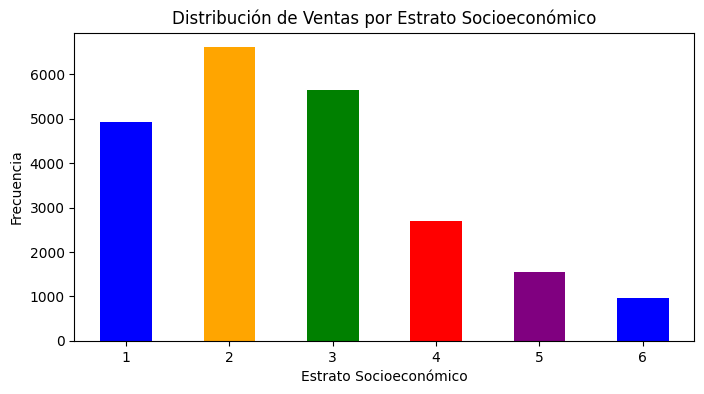

In [ ]:
# 4. Gráfico de barras de cantidad de ventas por estrato
# Configurar el tamaño de los gráficos
plt.figure(figsize=(8, 4))

# Histograma de los precios de los planes de internet
df["estrato"].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

#ventas_por_estrato.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Estrato Socioeconómico')
plt.ylabel("Frecuencia")
plt.title('Distribución de Ventas por Estrato Socioeconómico')
plt.xticks(rotation=0)
plt.show()

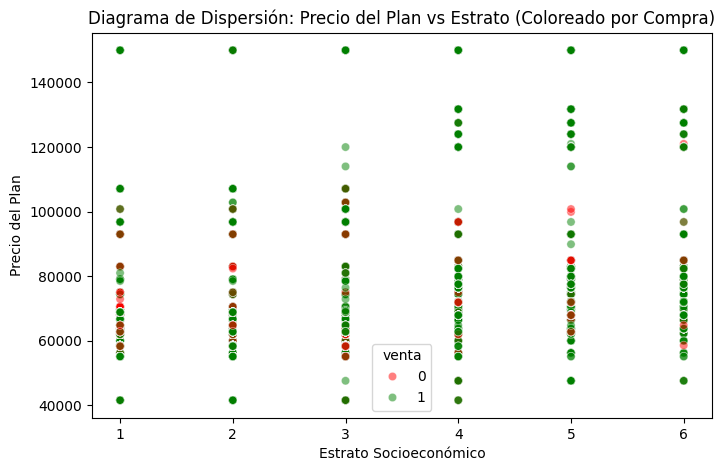

In [ ]:
# 1. Diagrama de dispersión entre price_plan y estrato con respecto a venta
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['estrato'], y=df['price_plan'], hue=df['venta'], palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Precio del Plan')
plt.title('Diagrama de Dispersión: Precio del Plan vs Estrato (Coloreado por Compra)')
plt.show()

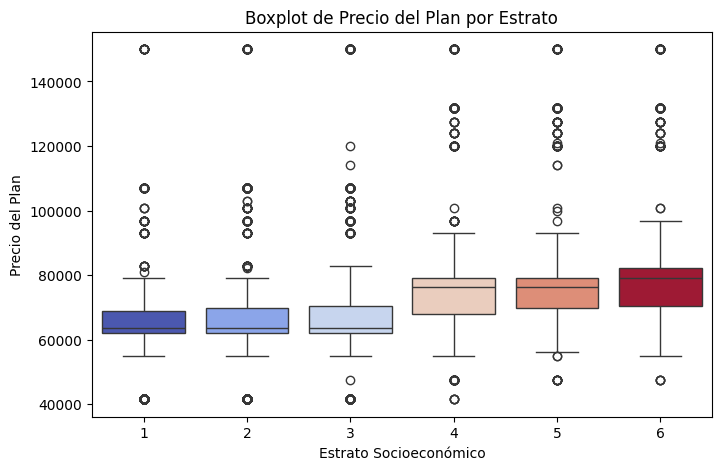

In [ ]:
# 2. Boxplot comparativo de price_plan por estrato
plt.figure(figsize=(8, 5))
sns.boxplot(x='estrato', y='price_plan', data=df, palette='coolwarm', hue='estrato', dodge=False)
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Precio del Plan')
plt.title('Boxplot de Precio del Plan por Estrato')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()

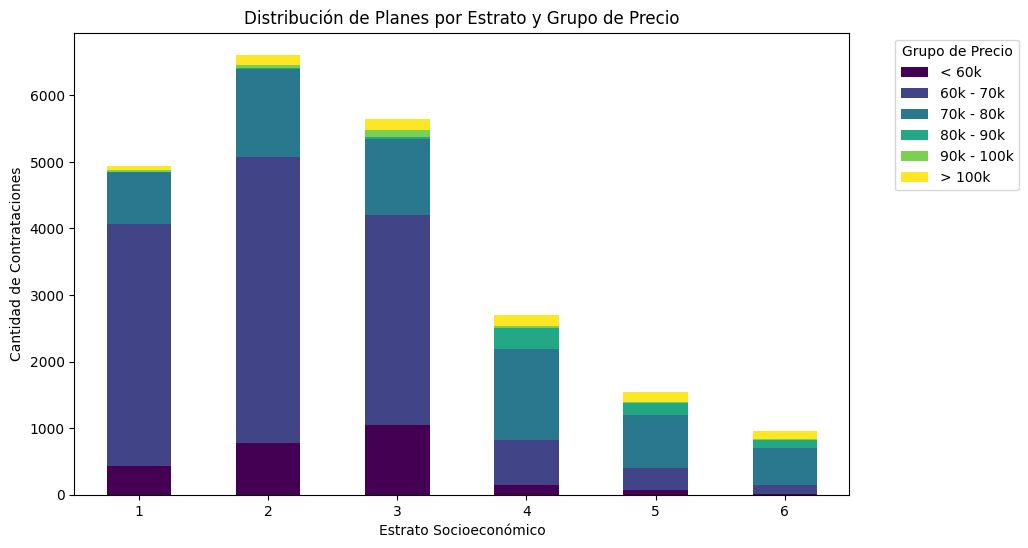

In [ ]:
# Definir los nombres correctos para los grupos de precio según la tabla anterior
nombres_correctos = ['< 60k', '60k - 70k', '70k - 80k', '80k - 90k', '90k - 100k', '> 100k', '> 100k+', '> 120k+', '> 140k+']

# Ajustar el número de etiquetas al número de columnas de la tabla
tabla_contingencia_agrupada.columns = nombres_correctos[:len(tabla_contingencia_agrupada.columns)]

# Crear un gráfico de barras apilado con los nombres correctos
tabla_contingencia_agrupada.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Contrataciones')
plt.title('Distribución de Planes por Estrato y Grupo de Precio')
plt.legend(title="Grupo de Precio", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

## Conclusiones:

#### Distribución de los Precios de los Planes
- La mayoría de los planes tienen un precio entre 60,000 y 80,000.
- Hay una menor cantidad de planes en los extremos (>100k y <60k).
- La distribución está sesgada a la derecha, lo que indica que los planes más costosos son menos frecuentes.
> Los clientes parecen concentrarse en planes de rango medio, lo que sugiere que la mayoría busca un equilibrio entre costo y beneficio.

#### Relación entre Precio del Plan y Estrato
- Hay una correlación positiva moderada (0.35) entre estrato y precio del plan.
- Los estratos bajos prefieren planes más económicos (~60k - 70k).
- Los estratos más altos (4, 5, 6) tienen más variabilidad y compran planes más caros, pero en menor cantidad.
> El nivel socioeconómico influye en la elección del plan, y las estrategias comerciales deben enfocarse en ofrecer paquetes adecuados a cada segmento.

#### Distribución de Planes por Estrato y Grupo de Precio
- Los estratos 1, 2 y 3 concentran la mayor parte de los planes contratados en el rango de 60k - 80k.
- Los estratos más altos tienen una mayor distribución de precios, pero con menor presencia.
- Los planes más caros (>100k) solo son contratados por clientes de estratos altos, pero en volúmenes bajos.
> El mercado masivo está en los estratos bajos y medios, por lo que la optimización de precios y promociones en estos segmentos es clave para maximizar las ventas.

#### Hipótesis para un Análisis Más Profundo

Análisis de tasas de conversión: Evaluar qué factores influyen en la compra y rechazo de planes según el estrato y precio.

Segmentación de clientes por tipo de plan: Identificar si ciertos estratos prefieren paquetes completos (Internet + Teléfono) o solo internet.

Predicción de demanda: Modelar qué planes tienen mayor probabilidad de ser contratados en los próximos 3 meses según tendencias históricas.

Tendencias temporales: ¿Existen meses o días con mayor contratación?